<a href="https://colab.research.google.com/github/charan1435/RandomForestClassiferForFraudDetection/blob/main/AppliedAICW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

In [ ]:
#File path for the dataset
file_path = '/content/drive/MyDrive/AppliedAIDataset/creditcard.csv'

#Load the dataset
data = pd.read_csv(file_path)

#display the first few rows
print(data.head())
#Check data summary
print(data.info())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# Assuming the dataset is already loaded
print(data['Class'].value_counts())  # Check class imbalance


Class
0    284315
1       492
Name: count, dtype: int64


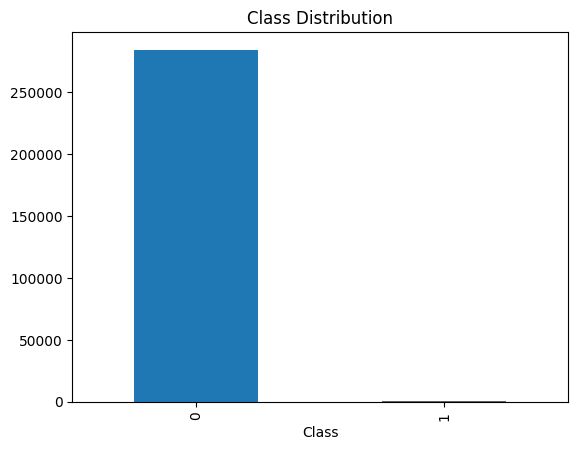

In [ ]:
#Plotting the imbalance data
data['Class'].value_counts().plot(kind='bar', title='Class Distribution');


In [ ]:
# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Step 1: Split into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

# Step 2: Split temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Verify the splits
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("\nValidation set class distribution:\n", y_val.value_counts(normalize=True))
print("\nTesting set class distribution:\n", y_test.value_counts(normalize=True))

Training set class distribution:
 Class
0    0.998274
1    0.001726
Name: proportion, dtype: float64

Validation set class distribution:
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64

Testing set class distribution:
 Class
0    0.998262
1    0.001738
Name: proportion, dtype: float64


In [ ]:
#Normalize feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced',  # Handles class imbalance
    random_state=42
)

In [ ]:
#Train the Model
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [ ]:
#Make prediction using training
y_pred = rf_model.predict(X_val_scaled)


In [ ]:
#same as above for probability
y_proba = rf_model.predict_proba(X_val_scaled)[:, 1]


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Confusion Matrix:
 [[56848    15]
 [   27    71]]


In [ ]:
print("Classification Report:\n", classification_report(y_val, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.72      0.77        98

    accuracy                           1.00     56961
   macro avg       0.91      0.86      0.89     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
roc_auc = roc_auc_score(y_val, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.9815


In [ ]:

# Predict probabilities for the validation set
y_proba = rf_model.predict_proba(X_val_scaled)[:, 1]  # Probabilities for Class = 1

# Compute precision-recall values
precision, recall, _ = precision_recall_curve(y_val, y_proba)

# Calculate the AUPRC
auprc = auc(recall, precision)
print(f"AUPRC: {auprc:.4f}")


AUPRC: 0.7563
